In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [16]:
import pandas as pd
data = pd.read_csv('TravelInsurancePrediction.csv')
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [17]:
df=data.copy()

In [18]:
df.shape

(1987, 10)

In [19]:
del df['Unnamed: 0']

In [20]:
df.shape

(1987, 9)

In [21]:
textcol=df.select_dtypes(include='object').columns
floatcol=df.select_dtypes(exclude='object').columns

for i in textcol:
    print(i,'\n',df[i].unique())
for i in floatcol:
    print(i,'\n',df[i].unique())

Employment Type 
 ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot 
 ['Yes' 'No']
FrequentFlyer 
 ['No' 'Yes']
EverTravelledAbroad 
 ['No' 'Yes']
Age 
 [31 34 28 25 33 26 32 29 35 30 27]
AnnualIncome 
 [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
FamilyMembers 
 [6 7 4 3 8 9 5 2]
ChronicDiseases 
 [1 0]
TravelInsurance 
 [0 1]


In [22]:
# checking for null values
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [23]:
# lets check for duplicate values
df.duplicated().sum()

738

In [24]:
print('Shape before dropping Duplicate values: ',df.shape)
df.drop_duplicates(inplace=True)
print('Shape after dropping Duplicate values: ',df.shape)

Shape before dropping Duplicate values:  (1987, 9)
Shape after dropping Duplicate values:  (1249, 9)


In [25]:
# lets rename values of the columns 'Employment Type'  

df['Employment Type'].replace('Private Sector/Self Employed','PrivateSelf',inplace=True)

In [26]:
df['Employment Type'].replace('Government Sector','Govt',inplace=True)

In [27]:
df.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Govt,Yes,400000,6,1,No,No,0
1,31,PrivateSelf,Yes,1250000,7,0,No,No,0
2,34,PrivateSelf,Yes,500000,4,1,No,No,1


In [28]:
# renaming columns to shorten names for conveneince 
df.columns=['Age','EmpType','Graduate','Income','FamilySize','Disease','FreqFlyer',
            'Abroad Travel','Insurance']
df.head(2)

,Age,EmpType,Graduate,Income,FamilySize,Disease,FreqFlyer,Abroad Travel,Insurance
0,31,Govt,Yes,400000,6,1,No,No,0
1,31,PrivateSelf,Yes,1250000,7,0,No,No,0


In [29]:
df.shape

(1249, 9)

In [30]:
# Making separate dataframe for purchased and not purchased 

df_0 = df.query('Insurance==0')
df_1 = df.query('Insurance==1')

# df_1 = df[df['Insurance']==1]
# df_0 = df[df['Insurance']==0]

In [31]:
# Printing top 3 values of dataframe(not insured)
df_0.head(3)

,Age,EmpType,Graduate,Income,FamilySize,Disease,FreqFlyer,Abroad Travel,Insurance
0,31,Govt,Yes,400000,6,1,No,No,0
1,31,PrivateSelf,Yes,1250000,7,0,No,No,0
3,28,PrivateSelf,Yes,700000,3,1,No,No,0


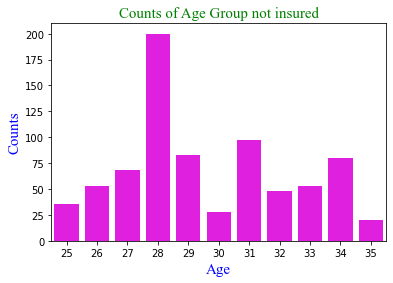

In [32]:
# Which age group buys least
age=df_0['Age'].value_counts().sort_values(ascending=True)
age
# ages=age.index
# counts=age.values

sns.barplot(x=age.index,y=age.values,color='magenta')
plt.xlabel('Age',fontsize=15,color='blue',family='times new roman')
plt.ylabel('Counts',fontsize=15,color='blue',family='times new roman')
plt.title('Counts of Age Group not insured',fontsize=15,color='green',family='times new roman')
plt.show()

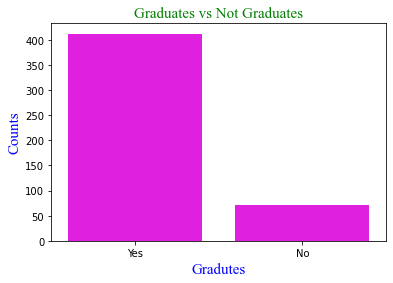

In [21]:
# Who get insured the most, graduate or non gradute
grad=df_1['Graduate'].value_counts().sort_values(ascending=False)
sns.barplot(x=grad.index,y=grad.values,color='magenta')
plt.xlabel('Gradutes',fontsize=15,color='blue',family='times new roman')
plt.ylabel('Counts',fontsize=15,color='blue',family='times new roman')
plt.title('Graduates vs Not Graduates',fontsize=15,color='green',family='times new roman')
plt.show()

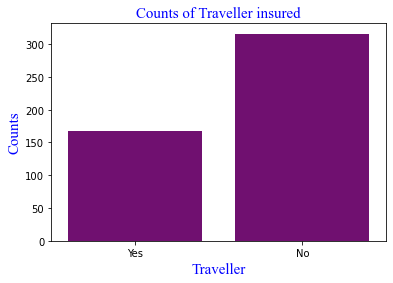

In [22]:
traveller=df_1['Abroad Travel'].value_counts().sort_values(ascending=True)
sns.barplot(x=traveller.index,y=traveller.values,color='purple')
plt.xlabel('Traveller',fontsize=15,color='blue',family='times new roman')
plt.ylabel('Counts',fontsize=15,color='blue',family='times new roman')
plt.title('Counts of Traveller insured',fontsize=15,color='blue',family='times new roman')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
ss=StandardScaler()
le=LabelEncoder()

In [24]:
# Label encoding of categorical data
df['EmpType']=le.fit_transform(df['EmpType'])
df['Graduate']=le.fit_transform(df['Graduate'])
df['FreqFlyer']=le.fit_transform(df['FreqFlyer'])
df['Abroad Travel']=le.fit_transform(df['Abroad Travel'])

In [25]:
df.head(2)

,Age,EmpType,Graduate,Income,FamilySize,Disease,FreqFlyer,Abroad Travel,Insurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0


In [26]:
df.rename(columns={'Travel Insurance':'Insurance'},inplace=True)
df.head(2)

,Age,EmpType,Graduate,Income,FamilySize,Disease,FreqFlyer,Abroad Travel,Insurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
df_0.head(2)

,Age,EmpType,Graduate,Income,FamilySize,Disease,FreqFlyer,Abroad Travel,Insurance
0,31,Govt,Yes,400000,6,1,No,No,0
1,31,PrivateS elf,Yes,1250000,7,0,No,No,0


In [29]:
df_1.head(2)

,Age,EmpType,Graduate,Income,FamilySize,Disease,FreqFlyer,Abroad Travel,Insurance
2,34,PrivateS elf,Yes,500000,4,1,No,No,1
7,31,PrivateS elf,Yes,1350000,3,0,Yes,Yes,1


In [30]:
df['Age'].min(),df['Age'].max()

(25, 35)

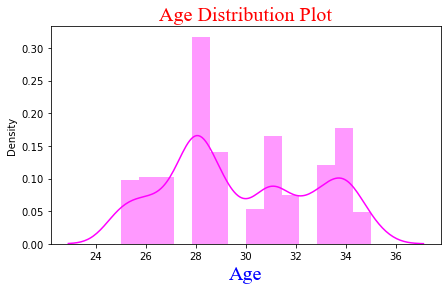

In [31]:
plt.figure(figsize=(7,4))
sns.distplot(x=df['Age'],color='magenta')
plt.xlabel('Age',fontsize=20,color='blue',family='times new roman')
plt.title('Age Distribution Plot',fontsize=20,color='red',family='times new roman')
plt.show()

In [32]:
age=df.Age.value_counts()
a=age.index
b=age.values

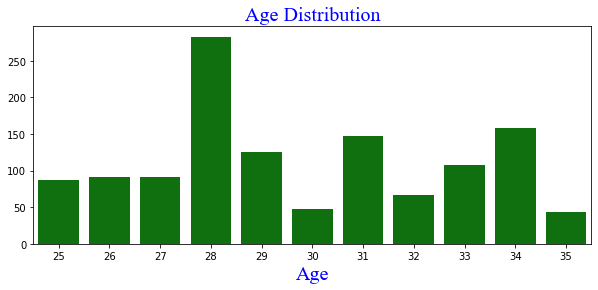

In [33]:
plt.figure(figsize=(10,4))
sns.barplot(x=a,y=b,color='green')
plt.xlabel('Age',fontsize=20,color='blue',family='times new roman')
# plt.ylabel('Insurance',fontsize=20,color='blue',family='times new roman')
plt.title('Age Distribution',fontsize=20,color='blue',family='times new roman')
plt.show()

In [34]:
emp=df.EmpType.value_counts()
a=emp.index
b=emp.values

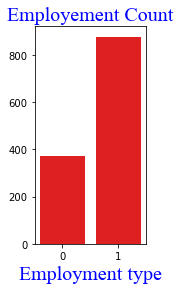

In [35]:
plt.figure(figsize=(2,4))
sns.barplot(x=a,y=b,color='red')
plt.xlabel('Employment type',fontsize=20,color='blue',family='times new roman')
# plt.ylabel('Insurance',fontsize=20,color='blue',family='times new roman')
plt.title('Employement Count',fontsize=20,color='blue',family='times new roman')
plt.show()

In [36]:
x=df.drop('Insurance',axis=1)
y=df.Insurance

In [37]:
x=ss.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [40]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(fit_intercept=True,C=1)

In [41]:
model1.fit(xtrain,ytrain)
model1.score(xtrain,ytrain),model1.score(xtest,ytest)

(0.7115384615384616, 0.7156549520766773)

In [42]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
abc=AdaBoostClassifier(n_estimators=50)
rfc=RandomForestClassifier(n_estimators=50)

In [43]:
abc.fit(xtrain,ytrain)
abc.score(xtrain,ytrain),abc.score(xtest,ytest)

(0.7660256410256411, 0.7380191693290735)

In [44]:
rfc.fit(xtrain,ytrain)
rfc.score(xtrain,ytrain),rfc.score(xtest,ytest)

(0.9145299145299145, 0.6293929712460063)